### Библиотеки

In [1]:
import pickle

In [2]:
# from importlib import reload
# import Experiment_6_part
# Experiment_6_part = reload(Experiment_6_part)
        
from Experiment_6_part2 import *

### Описание эксперимента:

### 0. Параметры для генерации данных

In [3]:
generate_flg=True # True - генерация, False - чтение уже сгенерированных

n=11 #число узлов
# n=51
L=1 # длина расчт области
T=.3 #конечное время
kurant=0.5

h=L/(n-1)
tau=kurant*(h**2)
b=(n-1)*0.1*L #width % of L (длина участка с v=1, составляет 10% от расчт области)
# IC
v=[0 for i in range(0,n)]
# v=np.abs(np.sin(np.linspace(0,np.pi,21)))
# BC
v[0]=0
v[-1]=1

In [22]:
h

0.1

In [4]:
# epochs_lst=[10,100,1_000,5_000,10_000]
epochs_lst=[10_000]
# epochs_lst=[1,100,1_000]

### 1. Генерация данных

In [5]:
CUSTOM_TAU=kurant*(h**2)
print('CUSTOM_TAU =',CUSTOM_TAU)
v_fact,x_lst,tau,time_lst=generate_data(generate_flg,v,T,L,0.5,h,n,CUSTOM_TAU=CUSTOM_TAU,save_flg=False)

CUSTOM_TAU = 0.005000000000000001
tau = 0.005000000000000001
Генерация данных
v_fact.shape = 11 61


Text(0.5, 1.0, 'Фактические данные')

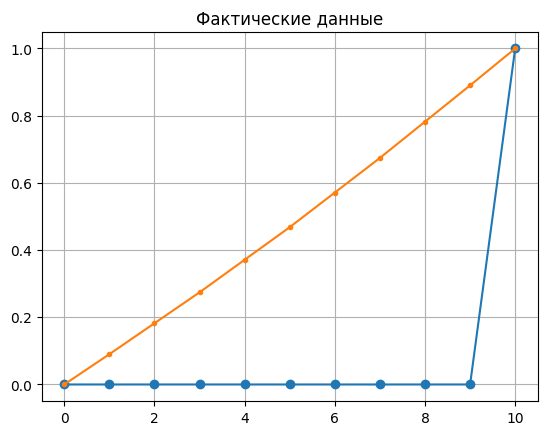

In [6]:
#view
plt.plot(v_fact[:,0],'o-')
plt.plot(v_fact[:,-1],'.-')
plt.grid()
plt.title('Фактические данные')

### 2. Сабсемплинг

In [7]:
t_factor = 1  # time subsample factor 
s_factor = 1  # space subsample factor
Tsim=len(v_fact[0])
dxc,dtc,coarse_t,coarse_x,v_coarse,Lxc,\
Ltc,v_coarse_train,v_coarse_test=subsampling(s_factor,t_factor,h,tau,Tsim,n,v_fact,train_split=train_split)

full_sample (11, 61)
train (11, 30)
test (11, 31)


Text(0.5, 1.0, 'Фактические данные после сабсемплинга')

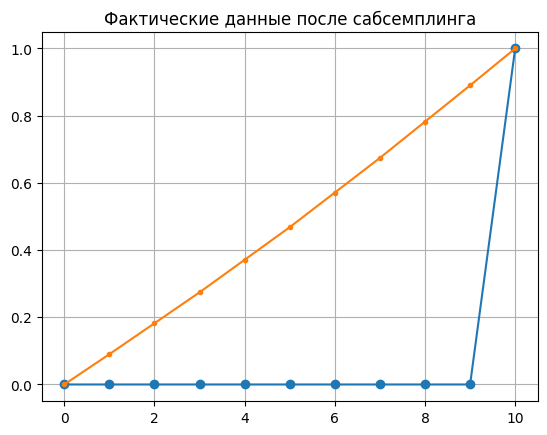

In [8]:
#view
plt.plot(v_coarse[:,0],'o-')
plt.plot(v_coarse[:,-1],'.-')
plt.grid()
plt.title('Фактические данные после сабсемплинга')

In [ ]:
# lr=0.1

### 3. Тренировка модели

In [12]:
for epochs in epochs_lst:
    
    net, loss_lst,loss=train_net(MLPConv,v_coarse_train,epochs,dtc,
              fs,
              neurons,
              hidden_layers_num,
              lr,
              m,
              has_backward,
              method,
              decay_const,
              verbose=True,
              verbose_step=500,
              continue_fitting=None
             )
    
    pickle.dump(net, open(fr'Experiment_6_part2/models/net_epochs={epochs}', 'wb'))
    

input 3 output 1
#parameters: 3


  0%|          | 17/10000 [00:00<00:59, 167.53it/s, loss=0.00123]

Веса после 0 эпохи:
tensor([[ 5.0224],
        [-5.0654],
        [ 8.1456]], grad_fn=<AsStridedBackward0>)


  6%|▌         | 562/10000 [00:02<00:27, 341.62it/s, loss=0.00053] 

Веса после 500 эпохи:
tensor([[-16.6362],
        [-41.9436],
        [ 44.8619]], grad_fn=<AsStridedBackward0>)


 10%|█         | 1043/10000 [00:03<00:30, 293.68it/s, loss=0.000338]

Веса после 1000 эпохи:
tensor([[  0.2508],
        [-74.1857],
        [ 59.8293]], grad_fn=<AsStridedBackward0>)


 15%|█▌        | 1529/10000 [00:05<00:24, 345.07it/s, loss=0.000185]

Веса после 1500 эпохи:
tensor([[  24.6996],
        [-105.3386],
        [  69.9166]], grad_fn=<AsStridedBackward0>)


 20%|██        | 2037/10000 [00:06<00:29, 270.75it/s, loss=9.21e-5] 

Веса после 2000 эпохи:
tensor([[  47.2192],
        [-133.6463],
        [  78.9150]], grad_fn=<AsStridedBackward0>)


 25%|██▌       | 2529/10000 [00:09<00:36, 202.61it/s, loss=3.82e-5]

Веса после 2500 эпохи:
tensor([[  66.1276],
        [-157.4137],
        [  86.4673]], grad_fn=<AsStridedBackward0>)


 30%|███       | 3049/10000 [00:10<00:21, 326.17it/s, loss=1.15e-5]

Веса после 3000 эпохи:
tensor([[  80.6349],
        [-175.6521],
        [  92.2629]], grad_fn=<AsStridedBackward0>)


 35%|███▌      | 3540/10000 [00:12<00:25, 255.76it/s, loss=2.8e-6] 

Веса после 3500 эпохи:
tensor([[  90.5088],
        [-188.0668],
        [  96.2081]], grad_fn=<AsStridedBackward0>)


 40%|████      | 4031/10000 [00:14<00:29, 204.22it/s, loss=4e-7]  

Веса после 4000 эпохи:
tensor([[  96.2068],
        [-195.2311],
        [  98.4847]], grad_fn=<AsStridedBackward0>)


 45%|████▌     | 4541/10000 [00:16<00:22, 244.40it/s, loss=0]   

Веса после 4500 эпохи:
tensor([[  98.8394],
        [-198.5409],
        [  99.5364]], grad_fn=<AsStridedBackward0>)


 50%|█████     | 5024/10000 [00:18<00:19, 254.51it/s, loss=0]

Веса после 5000 эпохи:
tensor([[  99.7489],
        [-199.6843],
        [  99.8997]], grad_fn=<AsStridedBackward0>)


 55%|█████▌    | 5528/10000 [00:20<00:18, 247.46it/s, loss=0]

Веса после 5500 эпохи:
tensor([[  99.9653],
        [-199.9563],
        [  99.9861]], grad_fn=<AsStridedBackward0>)


 60%|██████    | 6040/10000 [00:22<00:14, 273.19it/s, loss=0]

Веса после 6000 эпохи:
tensor([[  99.9973],
        [-199.9966],
        [  99.9989]], grad_fn=<AsStridedBackward0>)


 65%|██████▌   | 6535/10000 [00:24<00:14, 246.71it/s, loss=0]

Веса после 6500 эпохи:
tensor([[  99.9995],
        [-199.9994],
        [  99.9998]], grad_fn=<AsStridedBackward0>)


 70%|███████   | 7039/10000 [00:26<00:12, 241.55it/s, loss=0]

Веса после 7000 эпохи:
tensor([[  99.9997],
        [-199.9995],
        [  99.9998]], grad_fn=<AsStridedBackward0>)


 75%|███████▌  | 7528/10000 [00:28<00:11, 217.08it/s, loss=0]

Веса после 7500 эпохи:
tensor([[  99.9997],
        [-199.9996],
        [  99.9999]], grad_fn=<AsStridedBackward0>)


 80%|████████  | 8030/10000 [00:30<00:08, 240.46it/s, loss=0]

Веса после 8000 эпохи:
tensor([[  99.9999],
        [-199.9999],
        [ 100.0000]], grad_fn=<AsStridedBackward0>)


 85%|████████▌ | 8524/10000 [00:32<00:04, 332.64it/s, loss=0]

Веса после 8500 эпохи:
tensor([[ 100.0000],
        [-200.0000],
        [ 100.0000]], grad_fn=<AsStridedBackward0>)


 90%|█████████ | 9042/10000 [00:33<00:03, 295.25it/s, loss=0]

Веса после 9000 эпохи:
tensor([[ 100.],
        [-200.],
        [ 100.]], grad_fn=<AsStridedBackward0>)


 96%|█████████▌| 9556/10000 [00:35<00:01, 349.13it/s, loss=0]

Веса после 9500 эпохи:
tensor([[ 100.0000],
        [-200.0000],
        [ 100.0000]], grad_fn=<AsStridedBackward0>)


100%|██████████| 10000/10000 [00:36<00:00, 272.47it/s, loss=0]


In [19]:
net.layer[0].weight

Parameter containing:
tensor([[ 100.0000, -200.0000,  100.0000]], requires_grad=True)

### 4. Симуляция прогноза моделью

In [14]:
NN_sim_lst=[]

weights=[]
biases=[]

for epochs in epochs_lst:
    
    net = pickle.load(open(fr'Experiment_6_part2/models/net_epochs={epochs}', 'rb'))
    
    NN_sim,T_sim,x_sim=make_simulation(net,v_coarse,L,Lxc,dtc,method='E1')
    
    NN_sim_lst.append(NN_sim)
    
    # print(fr'------Epochs = {epochs}------')
    # print(net.layer[0].weight)
    weights.append(net.layer[0].weight.data.numpy())
    biases.append(None)

100%|██████████| 60/60 [00:00<00:00, 3653.95it/s]


In [20]:
net.layer[0].weight.data.numpy()

array([[  99.99999, -200.00002,   99.99999]], dtype=float32)

In [21]:
net.layer[0].weight

Parameter containing:
tensor([[ 100.0000, -200.0000,  100.0000]], requires_grad=True)

In [15]:
pd.DataFrame({'epoch':epochs_lst+[['finite_diff_methods']],
              'coefs':weights+[[1/((dxc)**2),-2/(dxc**2),1/(dxc**2)]],
              'bias':biases+[[None]]})

,epoch,coefs,bias
0,10000,"[[99.99999, -200.00002, 99.99999]]",None
1,[finite_diff_methods],"[99.99999999999999, -199.99999999999997, 99.99...",[None]


In [18]:
weights

[array([[  99.99999, -200.00002,   99.99999]], dtype=float32)]

### 5. Результаты

---------------Epochs = 10000-------------------


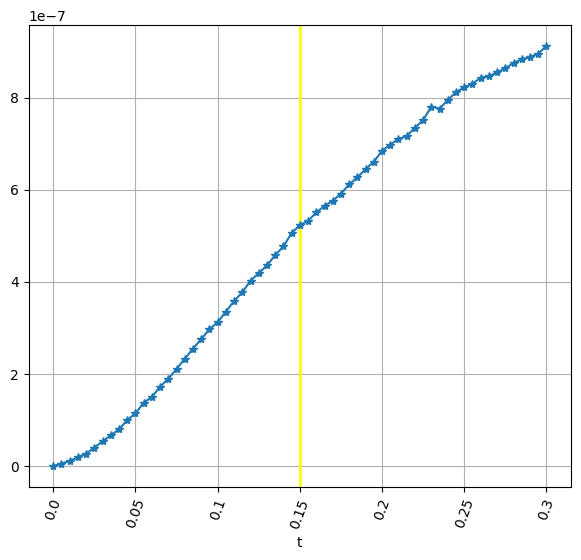

In [16]:
# view_results(T_sim,x_sim,NN_sim,v_coarse,T,dtc,n=10,fix_axes=True)

# view_result_imshow(NN_sim,v_coarse,T,dtc,L,dxc,figsize=(10,10))

folder='Experiment_6_part2'

for i in range(len(epochs_lst)):
    
    print(fr'---------------Epochs = {epochs_lst[i]}-------------------')
    view_results(T_sim,x_sim,NN_sim_lst[i],v_coarse,T,dtc,n=10,fix_axes=True,
                epochs=epochs_lst[i],
                save_path = fr'{folder}/graphs/',
                save_name = fr'Result_epoch={epochs_lst[i]}',
                view_flag=False)
    view_result_metric(NN_sim_lst[i],v_coarse,T,dtc,L,dxc,
                       n_xticks=10,
                       save_path = fr'{folder}/graphs/',
                save_name = fr'Metric_epoch={epochs_lst[i]}')

    make_gif(folder=fr'{folder}/graphs/',epochs=epochs_lst[i])

    print('\n')

In [17]:
net.layer[0].weight

Parameter containing:
tensor([[ 100.0000, -200.0000,  100.0000]], requires_grad=True)